# Classification

https://www.kaggle.com/datasets/rohitudageri/credit-card-details/data

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [40]:
df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")

df = pd.merge(df, labels, on='Ind_ID')

df = df.dropna()

In [41]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,M,Y,Y,1,450000.00,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.00,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.00,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.00,-678,1,0,1,1,Core staff,3,1
10,5010869,M,Y,Y,1,450000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.00,-678,1,0,1,1,Core staff,1,1
11,5018498,F,Y,Y,0,90000.00,Working,Secondary / secondary special,Married,House / apartment,-18950.00,-1002,1,1,1,0,Cooking staff,2,1
13,5018503,F,Y,Y,0,90000.00,Working,Secondary / secondary special,Married,House / apartment,-18950.00,-1002,1,1,1,0,Cooking staff,2,1


In [42]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose

Y = df["label"]
X = df

# transformer for categorical features
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', "CHILDREN", "Type_Income", "EDUCATION", "Marital_status", "Housing_type", "Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID", "Type_Occupation"]
categorical_transformer = pipeline.Pipeline(
    [
        ('onehot', preprocessing.OneHotEncoder(drop='first',handle_unknown = 'ignore')),
        ('StandardScaler', preprocessing.StandardScaler(with_mean=False))
    ]
)

# transformer for numerical features
numeric_features = ['Annual_income', 'Birthday_count', "Employed_days", "Family_Members"]
numeric_transformer = pipeline.Pipeline(
    [
        ('StandardScaler', preprocessing.StandardScaler(with_mean=False))
    ]
)

# combine them in a single ColumnTransformer
preprocessor = compose.ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [66]:
from sklearn import linear_model
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.3, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train
model = linear_model.LogisticRegression()

model.fit(X_train_processed, Y_train)
model.score(X_test_processed,Y_test)

0.8676880222841226

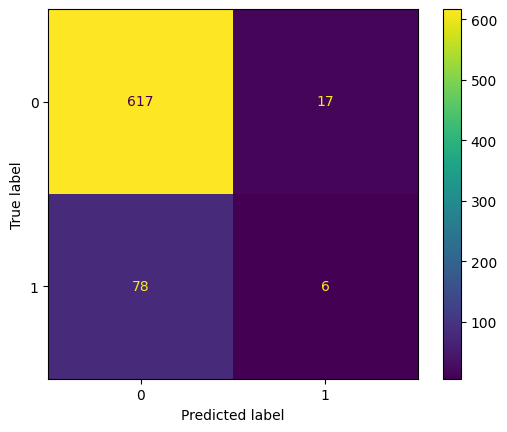

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       634
           1       0.26      0.07      0.11        84

    accuracy                           0.87       718
   macro avg       0.57      0.52      0.52       718
weighted avg       0.81      0.87      0.83       718



In [44]:
from sklearn import metrics

Y_pred = model.predict(X_test_processed)

cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(metrics.classification_report(Y_test, Y_pred))

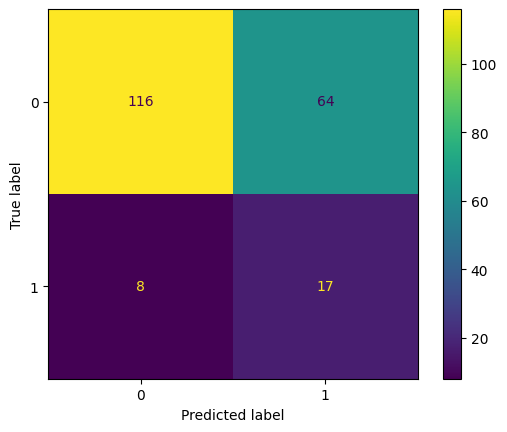

              precision    recall  f1-score   support

           0       0.94      0.64      0.76       180
           1       0.21      0.68      0.32        25

    accuracy                           0.65       205
   macro avg       0.57      0.66      0.54       205
weighted avg       0.85      0.65      0.71       205



In [67]:
from imblearn.over_sampling import SMOTE

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.8, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train

oversample = SMOTE(random_state=42)
X_train_processed,Y_train = oversample.fit_resample(X_train_processed,Y_train)

model = linear_model.LogisticRegression()

model.fit(X_train_processed, Y_train)
model.score(X_test_processed,Y_test)

Y_pred = model.predict(X_test_processed)

cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(metrics.classification_report(Y_test, Y_pred))


In [78]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.8, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train

X_train_processed = X_train_processed.todense()
X_test_processed = X_test_processed.todense()
    

cols = X_train.drop(columns="label").keys()
X_train_processed = pd.DataFrame(X_train_processed, columns=cols)
X_test_processed = pd.DataFrame(X_test_processed, columns=cols)


oversample = SMOTE(random_state=42)
X_train_processed,Y_train = oversample.fit_resample(X_train_processed,Y_train)

clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=42,
                     classifiers='all')

models, predictions = clf.fit(X_train_processed , X_test_processed , Y_train , Y_test)
models.sort_values(by="F1 Score",ascending=False)

ValueError: Shape of passed values is (820, 46), indices imply (820, 18)

numpy.matrix

In [77]:
X_train.drop(columns="label").keys()

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')